In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [2]:
#Viz notes

#Simplification
#Figure out consolidation schemes--ratios might be useful for rxtr params
#Exclude or dim unimportant data

#Headings for training set viz
#Goal for i.i.d. training set accomplished / not accomplished
#Certain locations in training set space difficult to predict OR error higher in certain locations in training set space
#Natural uranium not reliably predicted by any algorithm
#Complex models predict x parameters better than simple models (or vice versa)

In [3]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

In [4]:
# MWd/MTU
burn = pd.read_csv('sfcompo_burnup_predictions.csv')
# %u235
enri = pd.read_csv('sfcompo_enrichment_predictions.csv')
# days
cool = pd.read_csv('sfcompo_cooling_predictions.csv')

burn_knn = burn['kNN']//1000.
burn_rr = burn['Ridge']//1000.
burn_svr = burn['SVR']//1000.
enr_knn = enri['kNN']
enr_rr = enri['Ridge']
enr_svr = enri['SVR']

In [22]:
#trainXY = pd.read_pickle("sfcompo_pickles/trainset_nucs_act_8dec.pkl")
trainXY = pd.read_pickle("sfcompo_pickles/not-scaled_trainset_nucs_fissact_8dec.pkl")
#x = len(trainXY.columns)-3
#dfX = trainXY.iloc[:, 0:x]
#dfY_e = trainXY.iloc[:, x+1]
#dfY_b = trainXY.iloc[:, x+2]
# nucs messed up somehow and labels are at beginning
x = len(trainXY.columns)
dfY_b = trainXY.iloc[:, 0]
dfY_c = trainXY.iloc[:, 1]
dfY_e = trainXY.iloc[:, 2]
dfY_r = trainXY.iloc[:, 3]
dfX = trainXY.iloc[:, 4:x]

In [23]:
trainXY.columns

Index(['Burnup', 'CoolingTime', 'Enrichment', 'ReactorType', 'ba138', 'ce140',
       'ce142', 'ce144', 'cs133', 'cs135', 'cs137', 'la139', 'mo100', 'mo95',
       'mo97', 'mo98', 'nd143', 'nd144', 'nd145', 'nd146', 'pd104', 'pd105',
       'pd106', 'pr141', 'pu239', 'pu240', 'pu241', 'pu242', 'rb87', 'rh103',
       'ru101', 'ru102', 'ru104', 'sr88', 'sr90', 'tc99', 'total', 'u234',
       'u235', 'u236', 'u238', 'xe131', 'xe132', 'xe134', 'xe136', 'y89',
       'zr91', 'zr92', 'zr93', 'zr94', 'zr96'],
      dtype='object')

## Correlate Features

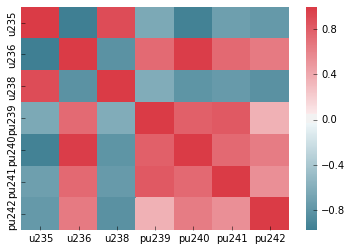

In [24]:
cols_fissact = ['u235', 'u236', 'u238',
                'pu239', 'pu240', 'pu241', 'pu242',
               ]
df_filtered = dfX[cols_fissact]

corr = df_filtered.corr()
#plt.matshow(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

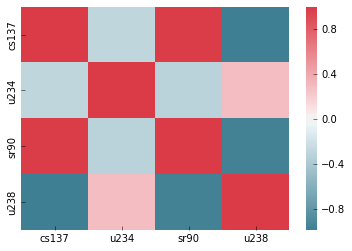

In [19]:
#other features

other_cols = ['cs137', 'u234', 'sr90', 'u238', ]
df_other = dfX[other_cols]

other_corr = df_other.corr()
sns.heatmap(other_corr, 
            xticklabels=other_corr.columns.values,
            yticklabels=other_corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

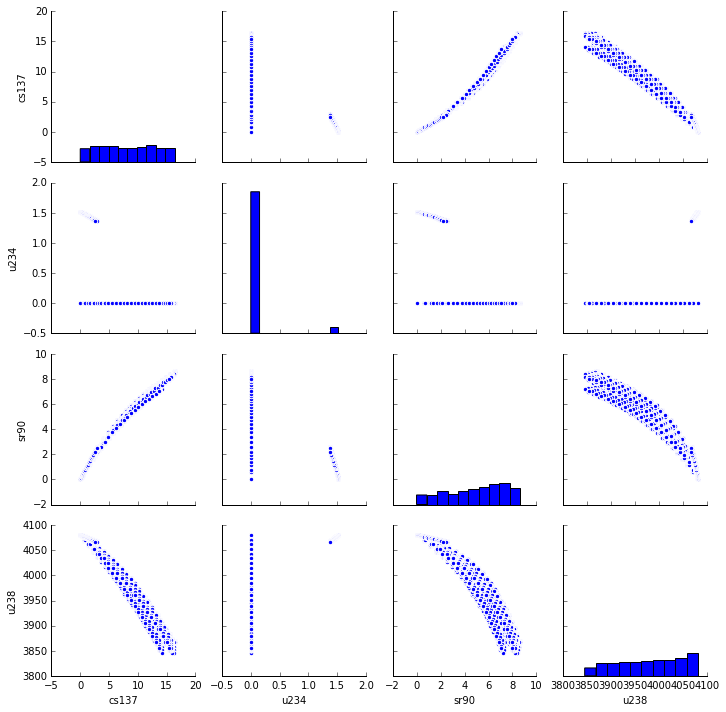

In [20]:
sns.pairplot(df_other)

## Burnup v. Enrichment here

In [25]:
x = dfY_b//1000.
y = dfY_e
#bin stuff
xbin = 1.5
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

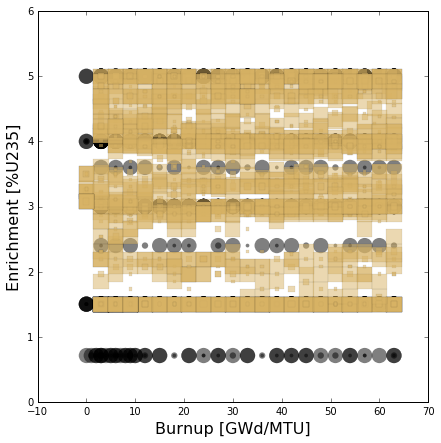

In [29]:
fig, axScatter = plt.subplots(figsize=(7, 7))
#axScatter.scatter(x, y, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
axScatter.scatter(x, y, s=ycount*0.1, c='k', alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
# commenting out diff algs; can do diff plots
axScatter.scatter(burn_knn, enr_knn, s=ycount*0.1, c=colors['MBrwn'], alpha=0.5, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, s=ycount*0.1, c=colors['MPurp'], alpha=0.5, linewidths=0.1, marker='s', label='Ridge Pred')
#axScatter.scatter(burn_svr, enr_svr, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='s', label='SVR Pred')
#axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
fig.savefig('test.png', bbox_inches='tight')
plt.show()

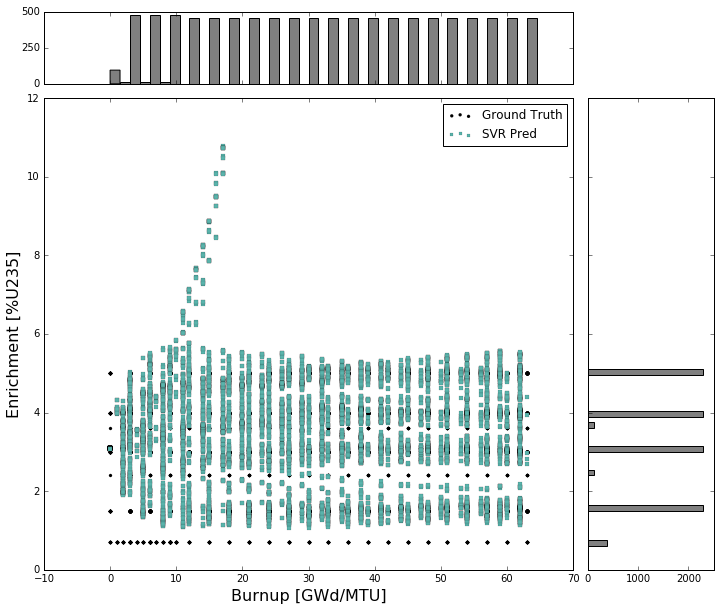

In [32]:
fig.clf()
fig, axScatter = plt.subplots(figsize=(12,10))
#fig.suptitle('test title', fontsize=20)
axScatter.scatter(x, y, c='k', s=10, linewidths=0.1, marker='o', label='Ground Truth')
#axScatter.scatter(burn_knn, enr_knn, c=colors['MBrwn'], s=10, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, c=colors['MPurp'], s=10, linewidths=0.1, marker='s', label='Ridge Pred')
axScatter.scatter(burn_svr, enr_svr, c=colors['MTeal'], s=10, linewidths=0.1, marker='s', label='SVR Pred')
axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1, pad=0.2, sharex=axScatter)
axHisty = divider.append_axes("right", 1.75, pad=0.2, sharey=axScatter)
axHistx.hist(x, bins=xbins, color='0.5')
axHisty.hist(y, bins=ybins, orientation='horizontal', color='0.5')
plt.setp(axHistx.get_xticklabels(), visible=False)
plt.setp(axHisty.get_yticklabels(), visible=False)
axHistx.set_yticks([0, 250, 500])
axHisty.set_xticks([0, 1000, 2000])
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
plt.show()

TypeError: You must first set_array for mappable

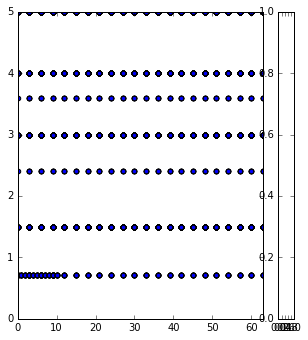

In [31]:
fig.clf()
fig, ax = plt.subplots(figsize=(5.5, 5.5))
scatcolor = ax.scatter(x, y, cmap='inferno')
ax.axis([0, xmax, 0, ymax])
cb = fig.colorbar(scatcolor, ax=ax)
cb.set_label('Count of Instances')

In [7]:
b_pred_csv = 'sfcompo_burnup_predictions.csv'
e_pred_csv = 'sfcompo_enrichment_predictions.csv'
c_pred_csv = 'sfcompo_cooling_predictions.csv'
bdf = pd.read_csv(b_pred_csv, index_col=[0])
edf = pd.read_csv(e_pred_csv, index_col=[0])
cdf = pd.read_csv(c_pred_csv, index_col=[0])
edf.sample(60)

,Ridge,SVR,TrueY,kNN
8.653e+02,4.323371,4.237043,4.000,4.246154
8.000e+02.1,3.296860,3.185404,3.000,2.907692
3.000e+03.2,5.116435,5.504246,5.000,4.692308
1.130e+03,5.511059,4.894630,5.000,5.000000
6.653e+02,3.045507,1.973634,1.500,2.192308
1.500e+03.1,3.093778,3.141002,3.000,2.953846
3.792e+03,1.022936,1.369043,1.500,1.500000
1.207e+03,2.407469,2.911659,3.000,3.000000
1.500e+02.2,3.309242,4.343160,5.000,4.769231
2.300e+02,3.959938,4.607917,5.000,4.553846
